## Lab 4: Building Scalable RAG Applications for Enterprise AI – Optimizing Performance, Cost, and Reliability

#### Overview 📋
In this lab, we will focus on designing and building a Retrieval-Augmented Generation (RAG) solution tailored for enterprise scalability and production readiness. The solution emphasizes performance optimization, cost efficiency, and modular design, ensuring seamless deployment across various platforms.

- **Semantic Caching**: Implement caching to enhance data retrieval efficiency, reduce latency, and optimize resource usage.
- **Logging and Monitoring**: Introduce robust logging mechanisms to track system performance and user behavior while ensuring reliability through real-time monitoring.
- **Modular Design**: Build a flexible, context-aware user interface (UI) that can adapt to various use cases and be deployed on platforms such as web applications, container services, or Kubernetes clusters.
- **Scalability and Availability**: Leverage load balancing and multi-region deployments to ensure throughput, redundancy, and high availability.

This lab will equip you with the skills to design a reliable, efficient, and scalable RAG system while meeting enterprise requirements for modularity, traceability, and cost-effectiveness.

#### Learning Objectives 🎯

**1. Ensure Throughput and Availability with Multi-Region Load Balancing**

**2. Integrate Semantic Caching with Cosmos DB (MongoDB Core)**

**3. Develop an Interactive Web Application with Streamlit**
  - **Why Streamlit?**
    - Streamlit is a Python-based framework for quickly creating dynamic, interactive user interfaces without requiring complex front-end development.
  - **Features to Build:**
    - **Dynamic User Interface**: Create a user-friendly interface that seamlessly connects users to the backend.
    - **"Chat with Your Data"**: Implement a feature that allows users to input questions and receive real-time, context-aware responses based on cached or retrieved data.

**4. Ensure Traceability and Logging with Application Insights**
  - **Why Logging and Monitoring?**
    - Logging and monitoring are essential for maintaining system performance, reliability, and traceability.
  - **Implementation Focus:**
    - **Logging**: Capture user interactions, queries, and responses to understand behavior and troubleshoot issues.
    - **Performance Monitoring**: Use telemetry data to identify latency issues and optimize the system.
    - **Error Handling**: Detect and address errors in real-time to ensure a consistent user experience.

By the end of this lab, you will have a comprehensive understanding of how to enhance data retrieval performance with semantic caching, build an interactive web application using Streamlit, and ensure traceability and logging for better system insights.

In [1]:
import os
# Define the target directory
target_directory = r"/Users/pablosal/Desktop/azure-ai-engineer-in-five-weeks"  # change your directory to the root folder

# Check if the directory exists
if os.path.exists(target_directory):
    # Change the current working directory
    os.chdir(target_directory)
    print(f"Directory changed to {os.getcwd()}")
else:
    print(f"Directory {target_directory} does not exist.")

from dotenv import load_dotenv
load_dotenv(dotenv_path=".env")

Directory changed to c:\Users\pablosal\Desktop\azure-ai-engineer-in-five-weeks


True

## **1. Ensure Throughput and Availability with Multi-Region Load Balancing in your AOAI (Azure OpenAI) solutions**

It's time to explore advanced system design. In production, we use an "AI gateway" approach where we combine serverless (PAYG) with PTU, and the gateways manage the throughput intelligently. This can "AutoScale" to handle many users/sessions, allowing you to focus on quality instead of troubleshooting.

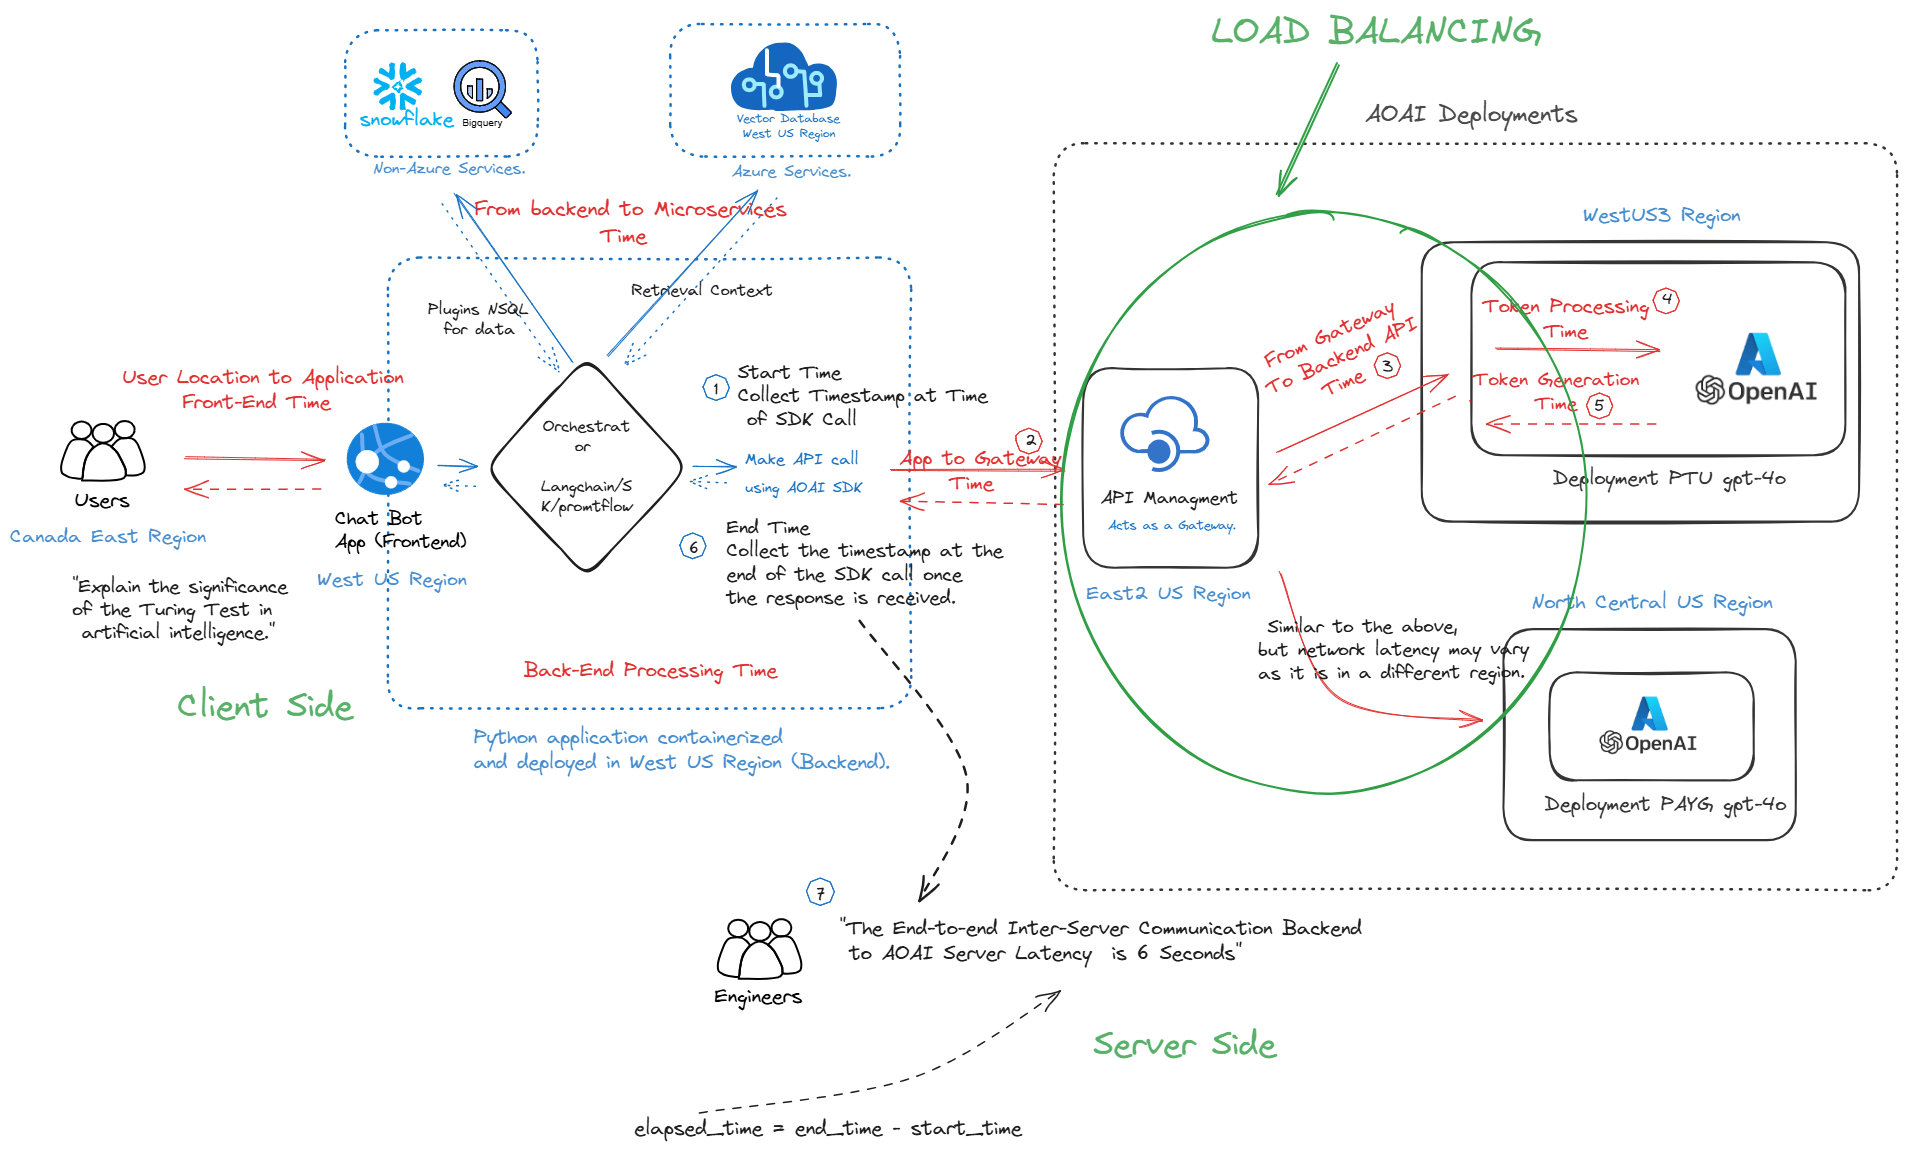

- **Why Multi-Region and Load Balancing?**
    - Ensuring optimal performance and reliability is critical for enterprise AI applications. Load balancing and multi-region deployments improve throughput, ensure redundancy, and support global availability.
- **Implementation Focus:**
    - Use load-balancing tools, such as Azure API Management (APIM), to distribute API requests across multiple regions.
    - Deploy services in multiple regions to provide redundancy and minimize downtime.
    - Monitor usage and scale resources proactively to meet demand.

> **Note:** We won't implement `AI Gateaway` in the lab, but you can refer to the following articles for more information and to push forward with your Understanding why we need this layer enterprise level:

- [Key Technical Challenges While Transitioning GenAI Applications to Production](https://pabloaicorner.hashnode.dev/key-technical-challenges-while-transitioning-genai-applications-to-production)
- [Error 429 Explained: Navigating Azure OpenAI API Rate Limits](https://pabloaicorner.hashnode.dev/error-429-explained-navigating-azure-openai-api-rate-limits)


Please visit this guide for detailed instructions on how to configure and optimize your Azure OpenAI enterprise design: [Azure OpenAI in Production](https://github.com/pablosalvador10/gbbai-azure-openai-in-production).

## **2. Integrate Semantic Caching with Cosmos DB (MongoDB Core)**
  - **What is Semantic Caching?**
    - Semantic caching stores commonly queried data or dynamically generated responses, reducing database latency and optimizing query performance.
  - **Why Cosmos DB?**
    - Cosmos DB, with its MongoDB Core API, offers a scalable, low-latency backend solution for storing and querying data. It supports distributed, high-performance, real-time interactions.
  - **Implementation Focus:**
    - Set up caching layers to reduce repeated queries.
    - Optimize database performance using Cosmos DB's scalable architecture.

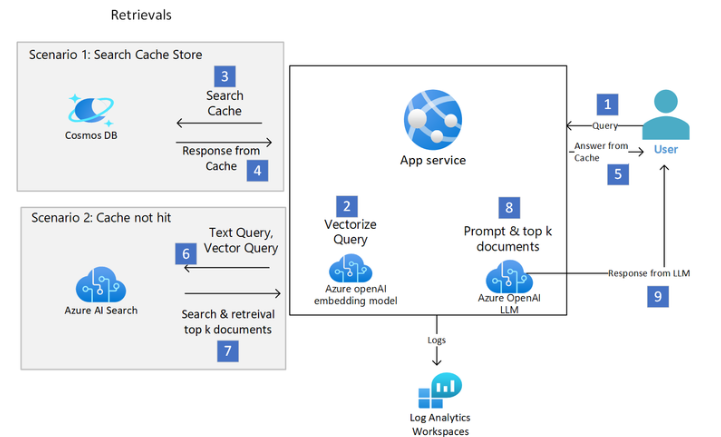
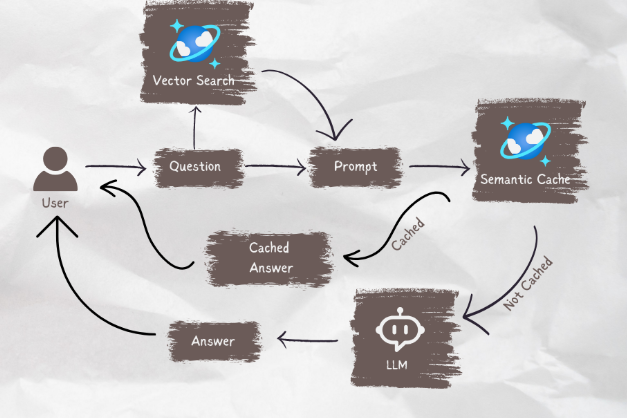

### Prerequisites

**1. Create an Azure Cosmos DB for MongoDB vCore resource**

Let's start by creating an Azure Cosmos DB for MongoDB vCore Resource following this quick start guide: https://learn.microsoft.com/en-us/azure/cosmos-db/mongodb/vcore/quickstart-portal

Then copy the connection details (server, user, pwd) into the .env file ('COSMOS_MONGO_USER', 'COSMOS_MONGO_PWD', 'COSMOS_MONGO_SERVER').

**2. Install packages**

In [11]:
#Make sure you have attached the correct kernel for your environment,
#then run the command below and restart the kernel:
%pip install pymongo azure-core azure-cosmos

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import necessary libraries
import os
import urllib.parse
import pymongo
from azure.core.credentials import AzureKeyCredential

# Environment variables for MongoDB connection
COSMOS_MONGO_USER = os.environ.get('COSMOS_MONGO_USER')
COSMOS_MONGO_PWD = os.environ.get('COSMOS_MONGO_PWD')
COSMOS_MONGO_SERVER = os.environ.get('COSMOS_MONGO_SERVER')

# Construct MongoDB connection string
mongo_conn = (
    "mongodb+srv://"
    + urllib.parse.quote(COSMOS_MONGO_USER)
    + ":"
    + urllib.parse.quote(COSMOS_MONGO_PWD)
    + "@"
    + COSMOS_MONGO_SERVER
    + "?tls=true&authMechanism=SCRAM-SHA-256&retrywrites=false&maxIdleTimeMS=120000"
)

# MongoDB connection setup
try:
    mongo_client = pymongo.MongoClient(mongo_conn)
    db = mongo_client["mydatabase"]
    print("✅ Connected to MongoDB.")
except pymongo.errors.ConnectionError as e:
    print(f"❌ MongoDB connection error: {e}")


C:\Users\pablosal\AppData\Local\Temp\ipykernel_37384\1943086186.py:25: UserWarning: You appear to be connected to a CosmosDB cluster. For more information regarding feature compatibility and support please visit https://www.mongodb.com/supportability/cosmosdb
  mongo_client = pymongo.MongoClient(mongo_conn)


✅ Connected to MongoDB.


**Set up the DB and collection**

In [66]:
# create a database called TutorialDB
db = mongo_client['ExampleDB']

# Create collection if it doesn't exist
COLLECTION_NAME = "ExampleCollection"

collection = db[COLLECTION_NAME]

if COLLECTION_NAME not in db.list_collection_names():
    # Creates a unsharded collection that uses the DBs shared throughput
    db.create_collection(COLLECTION_NAME)
    print("Created collection '{}'.\n".format(COLLECTION_NAME))
else:
    print("Using collection: '{}'.\n".format(COLLECTION_NAME))

Created collection 'ExampleCollection'.



**Create the vector index**

> IMPORTANT: You can only create one index per vector property. That is, you cannot create more than one index that points to the same vector property. If you want to change the index type (e.g., from IVF to HNSW) you must drop the index first before creating a new index.

**IVF index** (choose this one for our lab)

IVF is an approximate nerarest neighbors (ANN) approach that uses clustering to speed up the search for similar vectors in a dataset. It's a good choice for proof-of-concepts and smaller datasets (under a few thousand documents). However it's not recommended to use at scale or when higher throughput is needed.

IVF is supported on all cluster tiers, including the free tier.

In [65]:
# Use only if re-reunning code and want to reset db and collection
# collection.drop_indexes()
# mongo_client.drop_database("ExampleDB")

In [68]:
db.command({
    'createIndexes': 'ExampleCollection',
    'indexes': [
        {
            'name': 'VectorSearchIndex',
            'key': {
                'queryVector': 'cosmosSearch'  # Removed space in field name
            },
            'cosmosSearchOptions': {
                'kind': 'vector-ivf',
                'numLists': 50,  # Increase if needed
                'similarity': 'COS',  # Ensure correct similarity metric
                'dimensions': 1536  # Match the embedding size from Azure OpenAI
            }
        }
    ]
})


{'raw': {'defaultShard': {'numIndexesBefore': 1,
   'numIndexesAfter': 2,
   'createdCollectionAutomatically': False,
   'ok': 1}},
 'ok': 1}

In [72]:
indexes = collection.index_information()
for index_name, index_info in indexes.items():
    print(f"Index Name: {index_name}, Details: {index_info}")

Index Name: _id_, Details: {'v': 2, 'key': [('_id', 1)]}
Index Name: VectorSearchIndex, Details: {'v': 2, 'key': [('queryVector', 'cosmosSearch')], 'cosmosSearchOptions': SON([('kind', 'vector-ivf'), ('numLists', 50), ('similarity', 'COS'), ('dimensions', 1536)])}


**HNSW Index** (Don't choose this one for our lab but preferred for Prod)

HNSW stands for Hierarchical Navigable Small World, a graph-based index that partitions vectors into clusters and subclusters. With HNSW, you can perform fast approximate nearest neighbor search at higher speeds with greater accuracy. HNSW is now available on M40 and higher cluster tiers.

In [16]:
# db.command({ 
#     "createIndexes": "ExampleCollection",
#     "indexes": [
#         {
#             "name": "VectorSearchIndex",
#             "key": {
#                 "contentVector": "cosmosSearch"
#             },
#             "cosmosSearchOptions": { 
#                 "kind": "vector-hnsw", 
#                 "m": 16, # default value 
#                 "efConstruction": 64, # default value 
#                 "similarity": "COS", 
#                 "dimensions": 1536
#             } 
#         } 
#     ] 
# }
# )

**Upload data to the collection**

In [77]:
import os
import uuid
import datetime
import logging
from pymongo.collection import Collection
from src.aoai.aoai_helper import AzureOpenAIManager
from typing import List, Dict

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Simulated historical data to be stored in CosmosDB
data = [
    {
        "query": "What is covered under the PerksPlus program?",
        "response": "PerksPlus offers coverage for gym memberships, yoga, and outdoor sports.",
        "context": "PerksPlus covers a wide range of fitness activities, including gym memberships, yoga classes, outdoor activities like hiking and kayaking."
    },
    {
        "query": "What health plans are available at Contoso Electronics?",
        "response": "Northwind Health Plus and Northwind Standard are the two plans available.",
        "context": "Contoso Electronics offers Northwind Health Plus and Northwind Standard health plans, providing different levels of coverage."
    },
]

# Initialize Azure OpenAI Manager
aoai_helper = AzureOpenAIManager(
    api_key=os.getenv('AZURE_OPENAI_KEY'),
    api_version=os.getenv('AZURE_OPENAI_API_VERSION', "2023-05-15"),
    azure_endpoint=os.getenv('AZURE_OPENAI_ENDPOINT'),
    embedding_model_name=os.getenv('AZURE_OPENAI_EMBEDDING_DEPLOYMENT'),
    completion_model_name=os.getenv('AZURE_OPENAI_CHAT_DEPLOYMENT_ID'),
)

def generate_embeddings(text: str) -> List[float]:
    """
    Generates an embedding vector for the given text using Azure OpenAI.

    Args:
        text (str): The text to be converted into an embedding.

    Returns:
        List[float]: The generated embedding vector.
    """
    try:
        embedding_response = aoai_helper.generate_embedding(text)
        return embedding_response.data[0].embedding
    except Exception as e:
        logging.error(f"Error generating embedding for text: {text}. Error: {e}")
        return []

def generate_and_store_embeddings(data: List[Dict], collection: Collection, conversation_id: str) -> None:
    """
    Generates embeddings for the query fields only and stores them in CosmosDB.
    Ensures each message is associated with a provided conversation ID.

    Args:
        data (List[Dict]): The data entries containing queries and responses.
        collection (Collection): The CosmosDB collection where data will be stored.
        conversation_id (str): A consistent ID across all messages in a session.
    """
    processed_data = []

    for idx, item in enumerate(data):
        try:
            item["conversation_id"] = conversation_id
            item["message_id"] = str(uuid.uuid4())
            item["queryVector"] = generate_embeddings(item["query"])

            now = datetime.datetime.utcnow().isoformat()
            item["created_at"] = now
            item["updated_at"] = now
            item["@search.action"] = "upload"

            processed_data.append(item)
            logging.info(f"Processed item {idx+1}/{len(data)}")

        except Exception as e:
            logging.error(f"Error processing item {idx+1}: {e}")

    if processed_data:
        try:
            collection.insert_many(processed_data)
            logging.info("All records successfully inserted into CosmosDB.")
        except Exception as e:
            logging.error(f"Error inserting records into CosmosDB: {e}")

# Example usage (assuming `collection` is a valid CosmosDB collection)
conversation_id = "12345-abcde"
generate_and_store_embeddings(data, collection, conversation_id)


2025-01-28 22:09:18,090 - INFO - HTTP Request: POST https://pablo-m2unbt6w-swedencentral.openai.azure.com//openai/deployments/text-embedding-ada-002/embeddings?api-version=2023-05-15 "HTTP/1.1 200 OK"
2025-01-28 22:09:18,093 - INFO - Processed item 1/2
2025-01-28 22:09:18,256 - INFO - HTTP Request: POST https://pablo-m2unbt6w-swedencentral.openai.azure.com//openai/deployments/text-embedding-ada-002/embeddings?api-version=2023-05-15 "HTTP/1.1 200 OK"
2025-01-28 22:09:18,259 - INFO - Processed item 2/2
2025-01-28 22:09:18,306 - INFO - All records successfully inserted into CosmosDB.


**Retrieving data to the collection**

In [78]:
def vector_search_catching(query, collection, num_results=5, similarity_threshold=0.96):
    """
    Searches for semantically similar documents in CosmosDB.

    If a high-confidence result (similarity ≥ 0.96) is found, returns its response.
    Otherwise, returns None (indicating a fallback to an LLM-generated response may be needed).
    """

    # Generate the embeddings
    embedding_response = generate_embeddings(query)

    # Define search pipeline with required fields
    search_stage = {
        "$vectorSearch": {
            "index": "VectorSearchIndex",  # Ensure this matches the actual index name
            "path": "queryVector",         # Must match the field storing embeddings
            "queryVector": embedding_response,
            "numCandidates": num_results,
            "limit": num_results
        }
    }

    # Projection stage to include similarity score
    project_stage = {
        "$project": {
            "similarityScore": {"$meta": "searchScore"},
            "response": 1
        }
    }

    # Assemble and execute pipeline
    pipeline = [search_stage, project_stage]
    
    try:
        results = list(collection.aggregate(pipeline))  # Convert cursor to list for easy handling
    except Exception as e:
        print(f"❌ MongoDB vector search failed: {e}")
        return None

    if not results:
        print("⚠️ No matching vector results found in CosmosDB.")
        return None  # Prevents unnecessary fallback attempts

    # Retrieve best result by similarity score
    best_result = max(results, key=lambda x: x.get("similarityScore", 0), default=None)

    if best_result and best_result.get("similarityScore", 0) >= similarity_threshold:
        print(f"✅ Using cached response (score: {best_result['similarityScore']:.2f})")
        return best_result["response"]

    print(f"⚠️ No confident match found (best score: {best_result.get('similarityScore', 0):.2f}), falling back to LLM.")
    return None


In [80]:
# Example Usage
query = "What are the health plans available at Contoso Electronics?"
conversation_id = "12345-abcde"  # Assume we track conversations

cached_response = vector_search_catching(query, collection)

if cached_response:
    print(f"🔹 Cached Response: {cached_response}")
else:
    # Here you can implement a fallback mechanism like calling an LLM
    print("❌ No cached response. Generating new response via LLM...")

2025-01-28 22:09:57,206 - INFO - HTTP Request: POST https://pablo-m2unbt6w-swedencentral.openai.azure.com//openai/deployments/text-embedding-ada-002/embeddings?api-version=2023-05-15 "HTTP/1.1 200 OK"


✅ Using cached response (score: 1.00)
🔹 Cached Response: Northwind Health Plus and Northwind Standard are the two plans available.
